# <span style="color:red">Car Accident Severity</span>

### <span style="color:blue"> Import packages</span>

In [43]:
# Import packages

import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style="white", color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

import warnings # current version of seaborn generates a bunch of warnings 
                # that we'll ignore
warnings.filterwarnings("ignore")

from collections import Counter
import time
import random

In [3]:
# IMPORT SKLEARN PACKAGES 

from sklearn import datasets
from sklearn import linear_model
from sklearn.pipeline import Pipeline

# IMPORT PREPROCESSING

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# IMPORT MODEL AND FEATURE SELECTION

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import RFE, SelectFromModel

# IMPORT CLASSIFIER MODELS

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# IMPORT METRICS
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score

# SAMPLING MODELS
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

# IMPORT DECOMPOSITION
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

### <span style="color:blue"> Load Dataset</span>

In [5]:
# Import csv file to a a dataframe

data = pd.read_csv("Data-Collisions.csv")

data.head(3)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N


In [6]:
# print data columns

data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [7]:
# Print Data Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [8]:
# Check if data set is balanced

df_percent = pd.DataFrame(data.SEVERITYCODE.value_counts())

df_percent['Percentage'] = 100*df_percent['SEVERITYCODE']/data.shape[0]
df_percent

,SEVERITYCODE,Percentage
1,136485,70.109877
2,58188,29.890123


### <span style="color:blue">Cleaning Dataset</span>

In [9]:
# Look at total missing values at each column

data.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

### data.isna().sum() is a panda series so 
### I will use data.isna().sum()>75000 condition to generate boolean series to use in the data.columns object
### I will drop columns with high missing values

In [10]:
# Find columns with high number of missing values

a = data.columns[data.isna().sum()>75000]
print(type(a))
a

<class 'pandas.core.indexes.base.Index'>


Index(['INTKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'INATTENTIONIND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING'],
      dtype='object')

In [11]:
# drop columns with high missing values

df = data.drop(columns=a)

# ReLook at total missing values at each column

df.isna().sum()

SEVERITYCODE         0
X                 5334
Y                 5334
OBJECTID             0
INCKEY               0
COLDETKEY            0
REPORTNO             0
STATUS               0
ADDRTYPE          1926
LOCATION          2677
SEVERITYCODE.1       0
SEVERITYDESC         0
COLLISIONTYPE     4904
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
INCDATE              0
INCDTTM              0
JUNCTIONTYPE      6329
SDOT_COLCODE         0
SDOT_COLDESC         0
UNDERINFL         4884
WEATHER           5081
ROADCOND          5012
LIGHTCOND         5170
ST_COLCODE          18
ST_COLDESC        4904
SEGLANEKEY           0
CROSSWALKKEY         0
HITPARKEDCAR         0
dtype: int64

In [12]:
df.shape

(194673, 31)

In [13]:
# I have almost 200000 raws and some features have around 5000 missing values. 5000/200000 ~ 2.5/100
# I will basically drop missing values because they only make 2.5% of the dataset

df_1 = df.dropna()
df_1.shape

(180067, 31)

### after dropping I lost 14000 raws(14000/194000~ 7% of the data)

In [14]:
# Find how many unique values in each column

# Iterate over the sequence of column names

for column in df_1:
    
    # Select column contents by column 
    
    print('{:<15} Column has number of {:>6} unique values.'.format(column,df_1[column].nunique()))
    
    print('\n')

SEVERITYCODE    Column has number of      2 unique values.


X               Column has number of  23145 unique values.


Y               Column has number of  23409 unique values.


OBJECTID        Column has number of 180067 unique values.


INCKEY          Column has number of 180067 unique values.


COLDETKEY       Column has number of 180067 unique values.


REPORTNO        Column has number of 180064 unique values.


STATUS          Column has number of      2 unique values.


ADDRTYPE        Column has number of      2 unique values.


LOCATION        Column has number of  23460 unique values.


SEVERITYCODE.1  Column has number of      2 unique values.


SEVERITYDESC    Column has number of      2 unique values.


COLLISIONTYPE   Column has number of     10 unique values.


PERSONCOUNT     Column has number of     47 unique values.


PEDCOUNT        Column has number of      7 unique values.


PEDCYLCOUNT     Column has number of      3 unique values.


VEHCOUNT        Column h

In [15]:
# I chack above and see that some columns have at least 180000 unique features. 
# This is as same as number of entries in the dataframe. This indicates that these columns are kind of id number.
# they will not be helpful in the meachine learning process.
# these columns also should be dropped

In [16]:
columns_to_drop = [ column for column in df_1 if len(df[column].unique())>180000]

print(columns_to_drop)

# drop columns with high # of unique values

df_2 = df_1.drop(columns=columns_to_drop)

['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO']


In [17]:
# I will also drop X, Y and location. This features will not be helpful in ML process.

df_3 = df_2.drop(columns=['X','Y','LOCATION'])

In [18]:
for column in df_3:
    
    print('{:<15} Column has number of {:>6} unique values.'.format(column,df[column].nunique()))

SEVERITYCODE    Column has number of      2 unique values.
STATUS          Column has number of      2 unique values.
ADDRTYPE        Column has number of      3 unique values.
SEVERITYCODE.1  Column has number of      2 unique values.
SEVERITYDESC    Column has number of      2 unique values.
COLLISIONTYPE   Column has number of     10 unique values.
PERSONCOUNT     Column has number of     47 unique values.
PEDCOUNT        Column has number of      7 unique values.
PEDCYLCOUNT     Column has number of      3 unique values.
VEHCOUNT        Column has number of     13 unique values.
INCDATE         Column has number of   5985 unique values.
INCDTTM         Column has number of 162058 unique values.
JUNCTIONTYPE    Column has number of      7 unique values.
SDOT_COLCODE    Column has number of     39 unique values.
SDOT_COLDESC    Column has number of     39 unique values.
UNDERINFL       Column has number of      4 unique values.
WEATHER         Column has number of     11 unique value

In [59]:
# Check if data set is balanced

df_1_percent = pd.DataFrame(df_3.SEVERITYCODE.value_counts())

df_1_percent['Percentage'] = 100*df_1_percent['SEVERITYCODE']/df_3.shape[0]
df_1_percent

,SEVERITYCODE,Percentage
1,124258,69.006536
2,55809,30.993464


In [61]:
print(df_1_percent['Percentage'][1]/df_1_percent['Percentage'][2])

2.2264867673672706


# <span style="color:red">**Exploratory Data Analysis**</span> <a class="anchor" id="3"></a>

### I will print crosstab of each feature

In [24]:
mkdir plots

In [19]:
#1. feature

feature = df_3.columns.to_list()[1]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

SEVERITYCODE       1      2
STATUS                     
Matched       124257  55809
Unmatched          1      0


In [20]:
# lets delete STATUS feature

df_last = df_3.drop(columns=['STATUS'])

In [21]:
# 2. feature
feature = df_3.columns.to_list()[2]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

SEVERITYCODE      1      2
ADDRTYPE                  
Block         88520  28565
Intersection  35738  27244


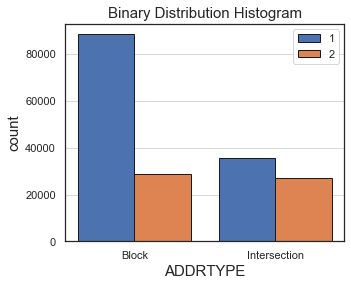

In [25]:
#Binary Distribution Histogram

plt.figure(figsize=[5,4])

plt.hist([df_3[df_3.SEVERITYCODE==1][feature],
          df_3[df_3.SEVERITYCODE==2][feature]], 
          bins=[-.5,.5,.5,1.5], 
          ec="k",
          label=('1','2'))

plt.xticks((0,1))
plt.grid(axis='y', alpha=0.75)

plt.xlabel(feature,fontsize=15)
plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/ADDRTYPE.png', dpi=100, bbox_inches='tight')

plt.show()

In [22]:
# 3. feature
feature = df_3.columns.to_list()[3]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

SEVERITYCODE         1      2
SEVERITYCODE.1               
1               124258      0
2                    0  55809


In [23]:
# SEVERITYCODE and SEVERITYCODE.1 are totally opposite so delete SEVERITYCODE.1

df_last = df_last.drop(columns=['SEVERITYCODE.1'])

In [24]:
# 4. feature

feature = df_3.columns.to_list()[4]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

SEVERITYCODE                         1      2
SEVERITYDESC                                 
Injury Collision                     0  55809
Property Damage Only Collision  124258      0


In [25]:
# SEVERITYCODE and SEVERITYDESC are same so delete SEVERITYDESC

df_last = df_last.drop(columns=['SEVERITYDESC'])

SEVERITYCODE       1      2
COLLISIONTYPE              
Angles         20811  13542
Cycles           656   4678
Head On         1123    856
Left Turn       8213   5373
Other          16172   5735
Parked Car     40262   2624
Pedestrian       660   5821
Rear Ended     18612  14166
Right Turn      2302    599
Sideswipe      15447   2415


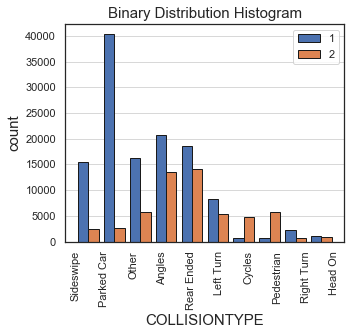

In [38]:
# 5. feature

feature = df_3.columns.to_list()[5]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

#Binary Distribution Histogram

plt.figure(figsize=[5,4])

plt.hist([df_3[df_3.SEVERITYCODE==1][feature],
          df_3[df_3.SEVERITYCODE==2][feature]], 
          #bins=[-.5,.5,.5,1.5], 
          ec="k",
          label=('1','2'))

#plt.xticks((0,1))
#plt.xticks(x, labels, rotation='vertical')
plt.xticks(rotation='vertical')
plt.grid(axis='y', alpha=0.75)

plt.xlabel(feature,fontsize=15)

plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/COLLISIONTYPE.png', dpi=100, bbox_inches='tight')

plt.show()

In [28]:
# 6. feature

feature = df_3.columns.to_list()[6]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

SEVERITYCODE      1      2
PERSONCOUNT               
0              3595   1715
1              7765   2796
2             77721  26687
3             21293  13063
4              8055   6100
5              3544   2906
6              1314   1333
7               475    621
8               242    279
9                81    126
10               53     74
11               21     33
12               13     19
13                9     12
14               11      6
15                4      7
16                3      4
17                3      8
18                5      1
19                3      2
20                4      1
21                2      0
22                2      2
23                1      1
24                1      1
25                5      0
26                4      0
27                2      1
28                2      1
29                2      1
30                1      1
31                1      0
32                2      1
34                1      2
35                1      0
3

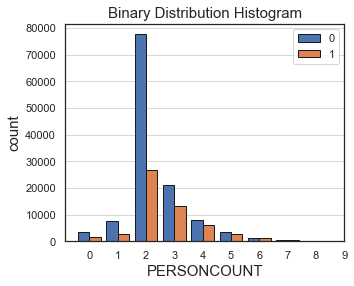

In [34]:
#Binary Distribution Histogram

plt.figure(figsize=[5,4])

plt.hist([df_3[df_3.SEVERITYCODE==1][feature],
          df_3[df_3.SEVERITYCODE==2][feature]], 
          bins=[-.5,.5,.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5], 
          ec="k",
          label=('0','1','2','3','4','5','6','7','8','9'))

plt.xticks((0,1,2,3,4,5,6,7,8,9))
plt.grid(axis='y', alpha=0.75)

plt.xlabel(feature,fontsize=15)
plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/PERSONCOUNT.png', dpi=100, bbox_inches='tight')

plt.show()

In [28]:
# 7. feature
feature = df_3.columns.to_list()[7]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

SEVERITYCODE       1      2
PEDCOUNT                   
0             123572  49687
1                666   5890
2                 19    205
3                  1     21
4                  0      4
5                  0      1
6                  0      1


SEVERITYCODE       1      2
PEDCYLCOUNT                
0             123597  51083
1                661   4685
2                  0     41


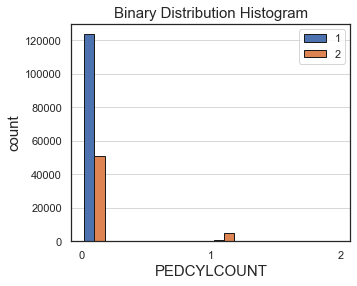

In [39]:
# 8. feature

feature = df_3.columns.to_list()[8]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

#Binary Distribution Histogram

plt.figure(figsize=[5,4])

plt.hist([df_3[df_3.SEVERITYCODE==1][feature],
          df_3[df_3.SEVERITYCODE==2][feature]], 
          #bins=[-.5,.5,.5,1.5], 
          ec="k",
          label=('1','2'))

plt.xticks((0,1,2))
#plt.xticks(x, labels, rotation='vertical')
#plt.xticks(rotation='vertical')
plt.grid(axis='y', alpha=0.75)

plt.xlabel(feature,fontsize=15)

plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/PEDCYLCOUNT.png', dpi=100, bbox_inches='tight')

plt.show()

SEVERITYCODE       1      2
VEHCOUNT                   
0                  3    192
1              10496  13630
2             104752  35258
3               7310   5325
4               1311   1056
5                263    255
6                 85     58
7                 21     20
8                 10      5
9                  3      6
10                 0      2
11                 3      2
12                 1      0


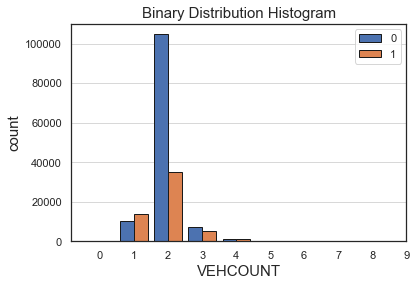

In [40]:
# 9. feature

feature = df_3.columns.to_list()[9]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

plt.hist([df_3[df_3.SEVERITYCODE==1][feature],
          df_3[df_3.SEVERITYCODE==2][feature]], 
          bins=[-.5,.5,.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5], 
          ec="k",
          label=('0','1','2','3','4','5','6','7','8','9'))

plt.xticks((0,1,2,3,4,5,6,7,8,9))
plt.grid(axis='y', alpha=0.75)

plt.xlabel(feature,fontsize=15)
plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/VEHCOUNT.png', dpi=100, bbox_inches='tight')

plt.show()

SEVERITYCODE                                           1      2
JUNCTIONTYPE                                                   
At Intersection (but not related to intersection)   1420    610
At Intersection (intersection related)             34291  26624
Driveway Junction                                   7247   3183
Mid-Block (but intersection related)               14941   7094
Mid-Block (not related to intersection)            66261  18252
Ramp Junction                                         94     45
Unknown                                                4      1


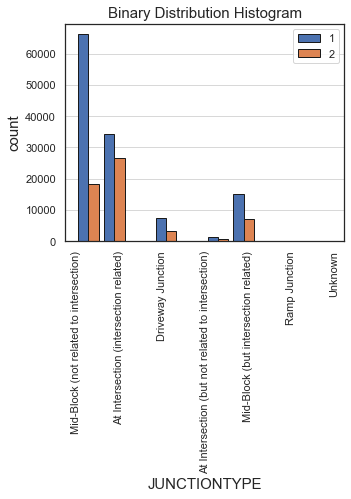

In [41]:
# 12. feature

feature = df_3.columns.to_list()[12]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

#Binary Distribution Histogram

plt.figure(figsize=[5,4])

plt.hist([df_3[df_3.SEVERITYCODE==1][feature],
          df_3[df_3.SEVERITYCODE==2][feature]], 
          #bins=[-.5,.5,.5,1.5], 
          ec="k",
          label=('1','2'))

#plt.xticks((0,1))
#plt.xticks(x, labels, rotation='vertical')
plt.xticks(rotation='vertical')
plt.grid(axis='y', alpha=0.75)

plt.xlabel(feature,fontsize=15)

plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/JUNCTIONTYPE.png', dpi=100, bbox_inches='tight')

plt.show()

SEVERITYCODE      1      2
SDOT_COLCODE              
0              2714    272
11            58588  23827
12             1338     27
13             5392    197
14            34553  16933
15             1487     73
16             8970    665
18              344   2665
21               40    140
22                1     14
23               31     89
24              638   5702
25               82     19
26             2983    974
27              124     35
28             6303   2179
29              112    345
31               94      7
32               11      1
33               51      2
34               81      9
35                5      1
36                3      1
44                0      8
46                3      0
47                1      0
48               94     11
51              147   1134
52                1      1
53                2      7
54               30    102
55               10     40
56               19    156
58                0      4
61                0      7
6

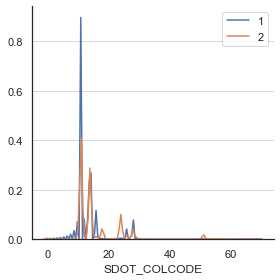

In [44]:
# 13. feature

feature = df_3.columns.to_list()[13]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

%matplotlib inline
matplotlib.use('Agg')
sns.FacetGrid(df_3, hue="SEVERITYCODE", size=4).map(sns.kdeplot, "SDOT_COLCODE")

#plt.title('Happy/unhappy customers vs Age',fontsize=15);
plt.legend(loc='upper right');
plt.grid(axis='y', alpha=0.75)
plt.savefig('plots/SDOT_COLCODE.png', dpi=100, bbox_inches='tight')

SEVERITYCODE                                            1      2
SDOT_COLDESC                                                    
DRIVERLESS VEHICLE RAN OFF ROAD - HIT FIXED OBJECT     94     11
DRIVERLESS VEHICLE RAN OFF ROAD - NO COLLISION          1      0
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE FRONT E...     94      7
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE LEFT SI...     51      2
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE LEFT SI...      3      1
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END       81      9
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE RIGHT S...     11      1
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE RIGHT S...      5      1
DRIVERLESS VEHICLE STRUCK OBJECT IN ROADWAY             3      0
DRIVERLESS VEHICLE STRUCK PEDESTRIAN                    0      8
MOTOR VEHCILE STRUCK PEDESTRIAN                       638   5702
MOTOR VEHICLE OVERTURNED IN ROAD                      112    345
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT        6303   2179
MOTOR VEHICLE RAN OFF ROA

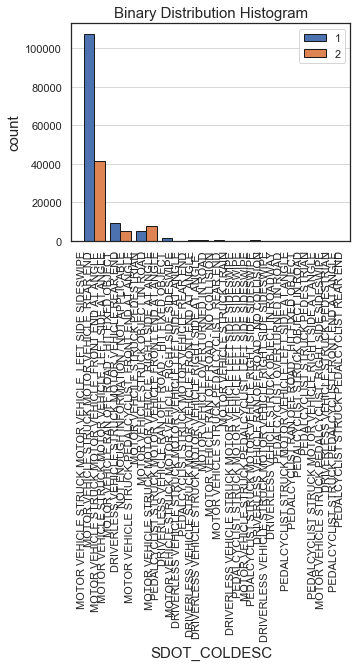

In [45]:
feature = df_3.columns.to_list()[14]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

#Binary Distribution Histogram

plt.figure(figsize=[5,4])

plt.hist([df_3[df_3.SEVERITYCODE==1][feature],
          df_3[df_3.SEVERITYCODE==2][feature]], 
          #bins=[-.5,.5,.5,1.5], 
          ec="k",
          label=('1','2'))

#plt.xticks((0,1))
#plt.xticks(x, labels, rotation='vertical')
plt.xticks(rotation='vertical')
plt.grid(axis='y', alpha=0.75)

plt.xlabel(feature,fontsize=15)

plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/SDOT_COLDESC.png', dpi=100, bbox_inches='tight')

plt.show()

SEVERITYCODE      1      2
UNDERINFL                 
0             55314  22200
1              2294   1584
N             63591  30145
Y              3059   1880


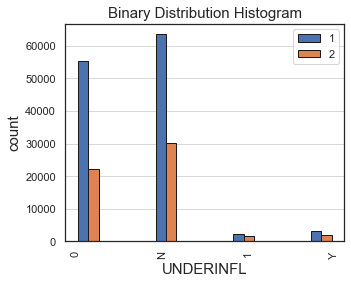

In [46]:
# 15. feature

feature = df_3.columns.to_list()[15]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

#Binary Distribution Histogram

plt.figure(figsize=[5,4])

plt.hist([df_3[df_3.SEVERITYCODE==1][feature],
          df_3[df_3.SEVERITYCODE==2][feature]], 
          #bins=[-.5,.5,.5,1.5], 
          ec="k",
          label=('1','2'))

#plt.xticks((0,1))
#plt.xticks(x, labels, rotation='vertical')
plt.xticks(rotation='vertical')
plt.grid(axis='y', alpha=0.75)

plt.xlabel(feature,fontsize=15)

plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/UNDERINFL.png', dpi=100, bbox_inches='tight')

plt.show()

SEVERITYCODE                  1      2
WEATHER                               
Blowing Sand/Dirt            36     13
Clear                     72527  35165
Fog/Smog/Smoke              365    184
Other                       618    110
Overcast                  18240   8569
Partly Cloudy                 2      3
Raining                   20910  10809
Severe Crosswind             17      7
Sleet/Hail/Freezing Rain     85     27
Snowing                     709    166
Unknown                   10749    756


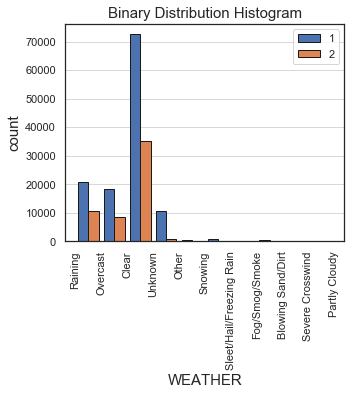

In [47]:
# 16. feature

feature = df_3.columns.to_list()[16]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

#Binary Distribution Histogram

plt.figure(figsize=[5,4])

plt.hist([df_3[df_3.SEVERITYCODE==1][feature],
          df_3[df_3.SEVERITYCODE==2][feature]], 
          #bins=[-.5,.5,.5,1.5], 
          ec="k",
          label=('1','2'))

#plt.xticks((0,1))
#plt.xticks(x, labels, rotation='vertical')
plt.xticks(rotation='vertical')
plt.grid(axis='y', alpha=0.75)

plt.xlabel(feature,fontsize=15)

plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/WEATHER.png', dpi=100, bbox_inches='tight')

plt.show()

SEVERITYCODE        1      2
ROADCOND                    
Dry             81351  39278
Ice               897    264
Oil                29     20
Other              76     39
Sand/Mud/Dirt      40     22
Snow/Slush        806    165
Standing Water     73     26
Unknown         10693    691
Wet             30293  15304


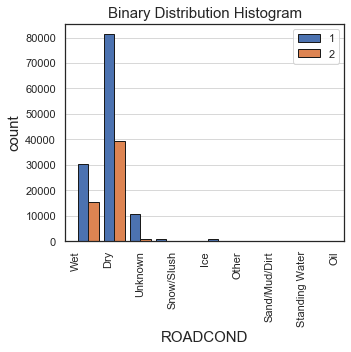

In [48]:
# 17. feature

feature = df_3.columns.to_list()[17]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

#Binary Distribution Histogram
plt.figure(figsize=[5,4])
plt.hist([df_3[df_3.SEVERITYCODE==1][feature],
          df_3[df_3.SEVERITYCODE==2][feature]], 
          #bins=[-.5,.5,.5,1.5], 
          ec="k",
          label=('1','2'))

#plt.xticks((0,1))
#plt.xticks(x, labels, rotation='vertical')
plt.xticks(rotation='vertical')
plt.grid(axis='y', alpha=0.75)

plt.xlabel(feature,fontsize=15)

plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/ROADCOND.png', dpi=100, bbox_inches='tight')

plt.show()

SEVERITYCODE                  1      2
LIGHTCOND                             
Dark - No Street Lights    1100    318
Dark - Street Lights Off    826    304
Dark - Street Lights On   32570  14113
Dark - Unknown Lighting       7      4
Dawn                       1582    807
Daylight                  74466  37750
Dusk                       3803   1905
Other                       135     37
Unknown                    9769    571


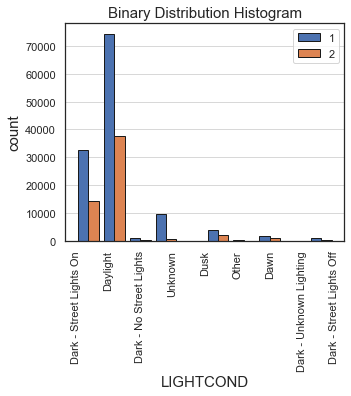

In [49]:
# 18. feature

feature = df_3.columns.to_list()[18]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

#Binary Distribution Histogram
plt.figure(figsize=[5,4])
plt.hist([df_3[df_3.SEVERITYCODE==1][feature],
          df_3[df_3.SEVERITYCODE==2][feature]], 
          #bins=[-.5,.5,.5,1.5], 
          ec="k",
          label=('1','2'))

#plt.xticks((0,1))
#plt.xticks(x, labels, rotation='vertical')
plt.xticks(rotation='vertical')
plt.grid(axis='y', alpha=0.75)

plt.xlabel(feature,fontsize=15)

plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/LIGHTCOND.png', dpi=100, bbox_inches='tight')

plt.show()

In [38]:
# 19. feature

feature = df_3.columns.to_list()[19]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

SEVERITYCODE      1     2
ST_COLCODE               
0                78   795
1                37   344
2                44   590
3                 5    77
4                 1    19
10             6860  4304
11             3430   531
12              807    84
13             1239   902
14             4698  3897
15              804   242
16              774   179
19              246    28
20              801   134
21              588   313
22              927   320
23             1221   250
24               73   124
25               21    14
26              259    87
27               63    15
28             1904  1476
29               77    13
30              243   139
31                5     2
32            14762   647
40               26     7
41               10     5
42                3     1
43                1     0
...             ...   ...
45              339  2698
48               21     1
49                0     1
5                59   351
50             6126  1989
51          

SEVERITYCODE                                            1      2
ST_COLDESC                                                      
All Other Multi Vehicle                                 5      3
All other non-collision                                70     31
Breakage of any part of the vehicle resulting i...     21      9
Domestic animal other (cat, dog, etc)                  29      2
Entering at angle                                   20811  13542
Fire started in vehicle                                 6      1
Fixed object                                         9158   2999
From opposite direction - all others                  830    442
From opposite direction - both going straight -...    172     52
From opposite direction - both going straight -...    734    276
From opposite direction - both moving - head-on       213    363
From opposite direction - one left turn - one r...    234     49
From opposite direction - one left turn - one s...   5645   4599
From opposite direction -

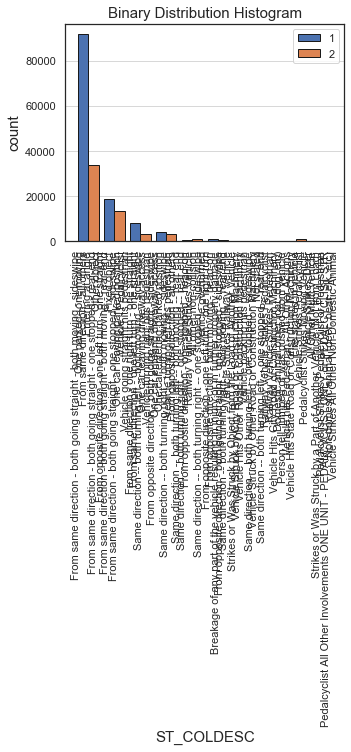

In [50]:
feature = df_3.columns.to_list()[20]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

#Binary Distribution Histogram
plt.figure(figsize=[5,4])
plt.hist([df_3[df_3.SEVERITYCODE==1][feature],
          df_3[df_3.SEVERITYCODE==2][feature]], 
          #bins=[-.5,.5,.5,1.5], 
          ec="k",
          label=('1','2'))

#plt.xticks((0,1))
#plt.xticks(x, labels, rotation='vertical')
plt.xticks(rotation='vertical')
plt.grid(axis='y', alpha=0.75)

plt.xlabel(feature,fontsize=15)

plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/ST_COLDESC.png', dpi=100, bbox_inches='tight')

plt.show()

In [40]:
# 21. feature

feature = df_3.columns.to_list()[21]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))



SEVERITYCODE       1      2
SEGLANEKEY                 
0             123959  53409
1189               0      1
1200               0      1
1248               0      1
1257               0      1
1271               1      0
1309               1      0
1350               0      1
1371               0      1
1408               1      0
1414               0      1
1499               0      1
1506               0      1
1550               0      1
1627               0      1
1793               0      1
1824               0      1
1873               0      1
1876               0      1
1884               0      1
1893               0      1
1961               0      1
2052               1      0
2105               1      1
2112               1      1
2115               1      0
2126               0      2
2167               0      1
2174               0      1
2181               0      1
...              ...    ...
43363              0      1
43451              1      0
43961              0

In [41]:
# 22. feature

feature = df_3.columns.to_list()[22]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

SEVERITYCODE       1      2
CROSSWALKKEY               
0             123850  52483
523                0      1
7358               0      1
9073               0      1
10590              0      1
15485              0      1
17558              1      0
21214              1      0
23860              1      0
23878              0      1
23883              0      1
24029              0      1
24099              0      1
24165              0      1
24267              0      1
24281              0      1
24377              1      0
24378              0      1
24409              0      1
24428              0      1
24450              0      1
24490              1      0
24533              1      0
24653              0      1
24855              1      0
24885              0      1
24908              0      1
25114              0      1
25131              0      1
25168              0      1
...              ...    ...
631355             0      1
631431             0      1
631432             0

SEVERITYCODE       1      2
HITPARKEDCAR               
N             118981  55405
Y               5277    404


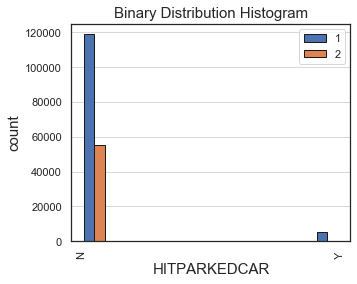

In [51]:
# 23. feature

feature = df_3.columns.to_list()[23]

aa = df_3[[feature,'SEVERITYCODE']]

print(pd.crosstab(aa[feature],aa['SEVERITYCODE']))

#Binary Distribution Histogram
plt.figure(figsize=[5,4])
plt.hist([df_3[df_3.SEVERITYCODE==1][feature],
          df_3[df_3.SEVERITYCODE==2][feature]], 
          #bins=[-.5,.5,.5,1.5], 
          ec="k",
          label=('1','2'))

#plt.xticks((0,1))
#plt.xticks(x, labels, rotation='vertical')
plt.xticks(rotation='vertical')
plt.grid(axis='y', alpha=0.75)

plt.xlabel(feature,fontsize=15)

plt.ylabel('count',fontsize=15)

plt.title('Binary Distribution Histogram',fontsize=15)
plt.legend(loc='upper right')

plt.grid(axis='y', alpha=0.75)

plt.savefig('plots/HITPARKEDCAR.png', dpi=100, bbox_inches='tight')

plt.show()

### All these features will be helpful in my machine learning process

# <span style="color:red">**Predictive Modelling**</span>

### <span style="color:blue"> Define X and Y</span>

In [43]:
# Define X and Y

X = df_last.iloc[:,1:]

### For now I will not use accident time and date for training

X = X.drop(columns=['INCDATE','INCDTTM'])

Y = df_last.SEVERITYCODE

### <span style="color:blue"> Labeling</span>

### some features are categorical I will need to label them or transfer them in such a way that machine can understand

In [44]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [45]:
X.dtypes[X.dtypes==object]

ADDRTYPE         object
COLLISIONTYPE    object
JUNCTIONTYPE     object
SDOT_COLDESC     object
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
ST_COLCODE       object
ST_COLDESC       object
HITPARKEDCAR     object
dtype: object

In [46]:
X.columns[X.dtypes==object]

Index(['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'SDOT_COLDESC',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'ST_COLDESC', 'HITPARKEDCAR'],
      dtype='object')

### I coulnd not label ST_COLCODE because it is mixture of str and numerical value, 
### I convert it to numeric to make it only one data type

In [47]:
X['ST_COLCODE'] = pd.to_numeric(X['ST_COLCODE'])

In [48]:
for column in X:
    
    s=column+"_new"
    
    if X[column].dtypes==object:
        
        X[s] = labelencoder.fit_transform(X[column])
        
        print('{:<18}'.format(s),"labeling is completed")

ADDRTYPE_new       labeling is completed
COLLISIONTYPE_new  labeling is completed
JUNCTIONTYPE_new   labeling is completed
SDOT_COLDESC_new   labeling is completed
UNDERINFL_new      labeling is completed
WEATHER_new        labeling is completed
ROADCOND_new       labeling is completed
LIGHTCOND_new      labeling is completed
ST_COLDESC_new     labeling is completed
HITPARKEDCAR_new   labeling is completed


In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180067 entries, 0 to 194672
Data columns (total 28 columns):
ADDRTYPE             180067 non-null object
COLLISIONTYPE        180067 non-null object
PERSONCOUNT          180067 non-null int64
PEDCOUNT             180067 non-null int64
PEDCYLCOUNT          180067 non-null int64
VEHCOUNT             180067 non-null int64
JUNCTIONTYPE         180067 non-null object
SDOT_COLCODE         180067 non-null int64
SDOT_COLDESC         180067 non-null object
UNDERINFL            180067 non-null object
WEATHER              180067 non-null object
ROADCOND             180067 non-null object
LIGHTCOND            180067 non-null object
ST_COLCODE           180067 non-null int64
ST_COLDESC           180067 non-null object
SEGLANEKEY           180067 non-null int64
CROSSWALKKEY         180067 non-null int64
HITPARKEDCAR         180067 non-null object
ADDRTYPE_new         180067 non-null int64
COLLISIONTYPE_new    180067 non-null int64
JUNCTIONTYPE_new   

### Drop object features in the Dataframe

In [50]:
XXX = X.drop(columns=X.columns[X.dtypes==object])

In [51]:
XXX.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,ADDRTYPE_new,COLLISIONTYPE_new,JUNCTIONTYPE_new,SDOT_COLDESC_new,UNDERINFL_new,WEATHER_new,ROADCOND_new,LIGHTCOND_new,ST_COLDESC_new,HITPARKEDCAR_new
0,2,0,0,2,11,10,0,0,1,0,1,14,2,4,8,5,4,0
1,2,0,0,2,16,11,0,0,0,9,4,16,0,6,8,2,16,0
2,4,0,0,3,14,32,0,0,0,5,4,17,0,4,0,5,27,0
3,3,0,0,3,11,23,0,0,0,4,4,14,2,1,0,5,14,0
4,2,0,0,2,11,10,0,0,1,0,1,14,0,6,8,5,4,0


In [52]:
XXX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180067 entries, 0 to 194672
Data columns (total 18 columns):
PERSONCOUNT          180067 non-null int64
PEDCOUNT             180067 non-null int64
PEDCYLCOUNT          180067 non-null int64
VEHCOUNT             180067 non-null int64
SDOT_COLCODE         180067 non-null int64
ST_COLCODE           180067 non-null int64
SEGLANEKEY           180067 non-null int64
CROSSWALKKEY         180067 non-null int64
ADDRTYPE_new         180067 non-null int64
COLLISIONTYPE_new    180067 non-null int64
JUNCTIONTYPE_new     180067 non-null int64
SDOT_COLDESC_new     180067 non-null int64
UNDERINFL_new        180067 non-null int64
WEATHER_new          180067 non-null int64
ROADCOND_new         180067 non-null int64
LIGHTCOND_new        180067 non-null int64
ST_COLDESC_new       180067 non-null int64
HITPARKEDCAR_new     180067 non-null int64
dtypes: int64(18)
memory usage: 26.1 MB


In [53]:
# split test and train data

X_train, X_test, y_train, y_test = train_test_split(XXX, Y, test_size=0.2, random_state=42)

### <span style="color:blue"> Define Functions</span>

In [54]:
""" A function to plot Confusion Matrix """

def plot_confusion_matrix(y, predictions, model_name, cmap='Purples', cbar=False):
    
    cm    = confusion_matrix(y, predictions)
    
    cm_df = pd.DataFrame(cm)
    
    labels = ['True Neg','False Pos','False Neg','True Pos']
              
    categories = ['Zero', 'One']

    fig, ax = plt.subplots(figsize=(7, 7))
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

    bottom, top = ax.get_ylim()
    _ = ax.set_ylim(bottom + 0.5, top - 0.5)

    plt.ylabel("Actual", fontweight='bold', fontsize=15)
    plt.xlabel("Predicted", fontweight='bold', fontsize=15)
    
    ax.set_xticklabels(["SEVERITYCODE(1)", "SEVERITYCODE(2)"], fontsize=13)
    ax.set_yticklabels(["SEVERITYCODE(1)", "SEVERITYCODE(2)"], fontsize=13)
    
    plt.title("Confusion Matrix for {} - Counts".format(model_name),fontweight='bold', fontsize=15,pad=20)
    plt.show()

In [55]:
""" A function to plot ROC curve and calculate AUC"""

def AUC_and_plot_ROC(model, X_test, y_test):
    
    probs = model.predict_proba(X_test)

    preds = probs[:,1]

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, preds)

    AUC = auc(false_positive_rate, true_positive_rate)
    

    # plot the roc curve for the model

    plt.title("")

    plt.plot(false_positive_rate, true_positive_rate, 'b', linestyle='--', label='AUC = %0.2f'% AUC)
    
    plt.plot([0,1],[0,1],'r--')

    plt.legend(loc='upper left')

    plt.xlim([0, 1])
    plt.ylim([0, 1])

    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
   
    return AUC

In [56]:
""" A function to calculate specificity from confusion matrix """

def specificity(y_test, y_pred):
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    return tn/(tn+fp)

In [57]:
""" A function to print confusion matrix and Classification report"""

def con_matrix_and_clas_report(y_test, y_pred):
    
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print("\nTrue negative: ",tn, "False positive: ",fp,"False negative: ",fn, "True positive: ",tp)

    print("\nSpecificity: ",specificity(y_test, y_pred))

    print("\nClassification report: \n \n", classification_report(y_test, y_pred))

## <span style="color:red"> 1. ML Model: Logistic Regression</span>

In [58]:
# Create LR Object

LR = LogisticRegression()

# Training 

start = time.process_time()

model_LR = LR.fit(X_train,y_train)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

# prediction

y_pred = model_LR.predict(X_test)

Time elapsed :  5.95 secs


In [59]:
model_LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [60]:
unique, counts = np.unique(y_pred, return_counts=True)

print(np.asarray((unique, counts)).T)

[[    1 33824]
 [    2  2190]]


Confusion Matrix: 
 [[24614   359]
 [ 9210  1831]]

True negative:  24614 False positive:  359 False negative:  9210 True positive:  1831

Specificity:  0.985624474432387

Classification report: 
 
               precision    recall  f1-score   support

           1       0.73      0.99      0.84     24973
           2       0.84      0.17      0.28     11041

    accuracy                           0.73     36014
   macro avg       0.78      0.58      0.56     36014
weighted avg       0.76      0.73      0.67     36014



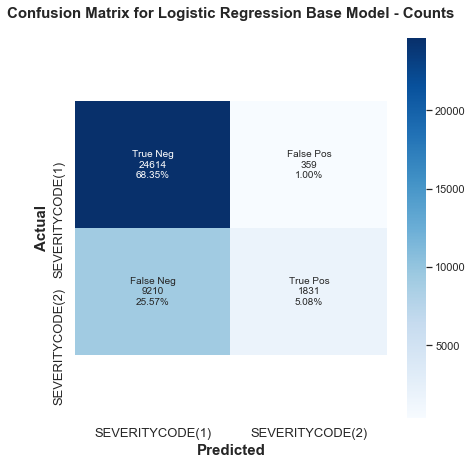

roc_auc_score:  0.5757304511460911


In [61]:
con_matrix_and_clas_report(y_test, y_pred)

plot_confusion_matrix(y_test, y_pred, 'Logistic Regression Base Model', cmap='Purples', cbar=False)

#Checking performance our model with ROC Score.

print("roc_auc_score: ",roc_auc_score(y_test, y_pred))

In [62]:
# RandomUnderSampler

X_resampled_rus, y_resampled_rus = RandomUnderSampler(random_state=0).fit_resample(X_train,y_train)

df1 = pd.DataFrame(y_resampled_rus)
df2 = pd.DataFrame(df1.SEVERITYCODE.value_counts())

df2['Percentage'] = 100*df2['SEVERITYCODE']/df1.shape[0]
df2

,SEVERITYCODE,Percentage
2,44768,50.0
1,44768,50.0


In [63]:
start = time.process_time()

model = LogisticRegression().fit(X_resampled_rus, y_resampled_rus)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

y_pred = model.predict(X_test)

Time elapsed :  3.57 secs


Confusion Matrix: 
 [[14347 10626]
 [ 3225  7816]]

True negative:  14347 False positive:  10626 False negative:  3225 True positive:  7816

Specificity:  0.5745004604973372

Classification report: 
 
               precision    recall  f1-score   support

           1       0.82      0.57      0.67     24973
           2       0.42      0.71      0.53     11041

    accuracy                           0.62     36014
   macro avg       0.62      0.64      0.60     36014
weighted avg       0.70      0.62      0.63     36014



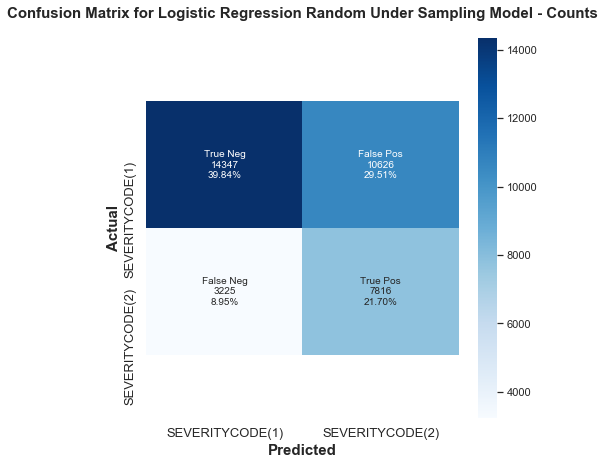

roc_auc_score:  0.6412036764944796


In [64]:
con_matrix_and_clas_report(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, 'Logistic Regression Random Under Sampling Model', cmap='Purples', cbar=False)

#Checking performance our model with ROC Score.

print("roc_auc_score: ",roc_auc_score(y_test, y_pred))

## <span style="color:red"> 2. ML Model: Random Forest Classifier</span>

In [65]:
start = time.process_time()

model = RandomForestClassifier().fit(X_train,y_train)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

y_pred = model.predict(X_test)

Time elapsed :  34.40 secs


Confusion Matrix: 
 [[22650  2323]
 [ 6819  4222]]

True negative:  22650 False positive:  2323 False negative:  6819 True positive:  4222

Specificity:  0.906979537900933

Classification report: 
 
               precision    recall  f1-score   support

           1       0.77      0.91      0.83     24973
           2       0.65      0.38      0.48     11041

    accuracy                           0.75     36014
   macro avg       0.71      0.64      0.66     36014
weighted avg       0.73      0.75      0.72     36014



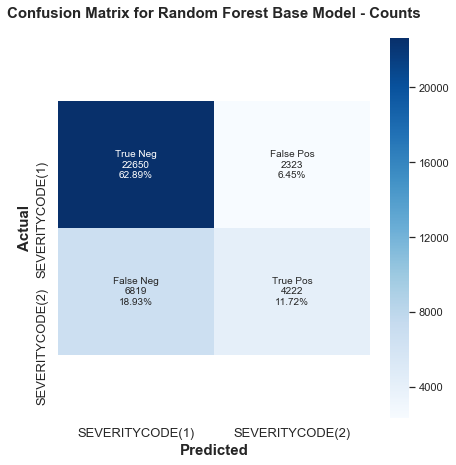

roc_auc_score:  0.6446862185474233


In [66]:
con_matrix_and_clas_report(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, 'Random Forest Base Model', cmap='Purples', cbar=False)

#Checking performance our model with ROC Score.

print("roc_auc_score: ",roc_auc_score(y_test, y_pred))

In [67]:
# RandomUnderSampler

#X_resampled_rus, y_resampled_rus = RandomUnderSampler(random_state=0).fit_resample(X_train,y_train)

start = time.process_time()

model = RandomForestClassifier().fit(X_resampled_rus, y_resampled_rus)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

y_pred = model.predict(X_test)

Time elapsed :  20.40 secs


Confusion Matrix: 
 [[15563  9410]
 [ 2517  8524]]

True negative:  15563 False positive:  9410 False negative:  2517 True positive:  8524

Specificity:  0.6231930484923718

Classification report: 
 
               precision    recall  f1-score   support

           1       0.86      0.62      0.72     24973
           2       0.48      0.77      0.59     11041

    accuracy                           0.67     36014
   macro avg       0.67      0.70      0.66     36014
weighted avg       0.74      0.67      0.68     36014



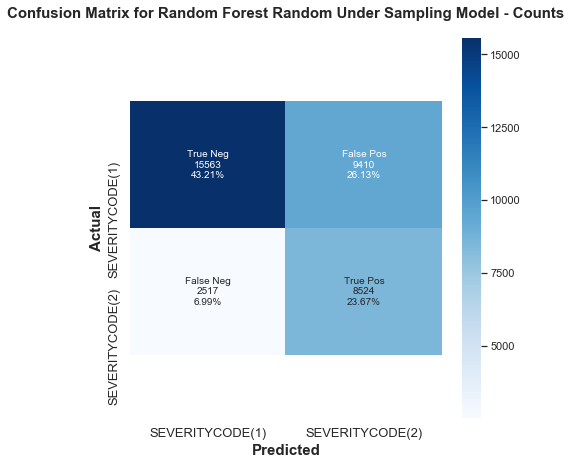

roc_auc_score:  0.6976122836882654


In [68]:
con_matrix_and_clas_report(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, 'Random Forest Random Under Sampling Model', cmap='Purples', cbar=False)

#Checking performance our model with ROC Score.

print("roc_auc_score: ",roc_auc_score(y_test, y_pred))

## <span style="color:red"> 3. ML Model: K Neighbors Classifier</span>

In [69]:
# Create KNN Object

knn = KNeighborsClassifier()

In [70]:
start = time.process_time()

model = knn.fit(X_train,y_train)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs \n')

Time elapsed :  202.84 secs 



In [71]:
y_pred = knn.predict(X_test)

In [72]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Confusion Matrix: 
 [[21423  3550]
 [ 6142  4899]]

True negative:  21423 False positive:  3550 False negative:  6142 True positive:  4899

Specificity:  0.8578464741921275

Classification report: 
 
               precision    recall  f1-score   support

           1       0.78      0.86      0.82     24973
           2       0.58      0.44      0.50     11041

    accuracy                           0.73     36014
   macro avg       0.68      0.65      0.66     36014
weighted avg       0.72      0.73      0.72     36014



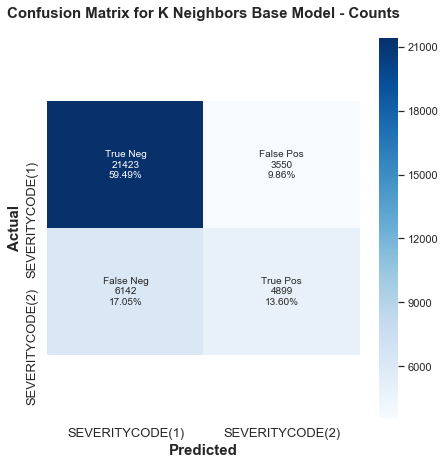

roc_auc_score:  0.6507781415431247


In [73]:
con_matrix_and_clas_report(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, 'K Neighbors Base Model', cmap='Purples', cbar=False)

#Checking performance our model with ROC Score.

print("roc_auc_score: ",roc_auc_score(y_test, y_pred))

In [74]:
# RandomUnderSampler

start = time.process_time()

model = KNeighborsClassifier().fit(X_resampled_rus, y_resampled_rus)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

y_pred = model.predict(X_test)

Time elapsed :  53.59 secs


Confusion Matrix: 
 [[23313  1660]
 [ 7853  3188]]

True negative:  23313 False positive:  1660 False negative:  7853 True positive:  3188

Specificity:  0.9335282104673047

Classification report: 
 
               precision    recall  f1-score   support

           1       0.75      0.93      0.83     24973
           2       0.66      0.29      0.40     11041

    accuracy                           0.74     36014
   macro avg       0.70      0.61      0.62     36014
weighted avg       0.72      0.74      0.70     36014



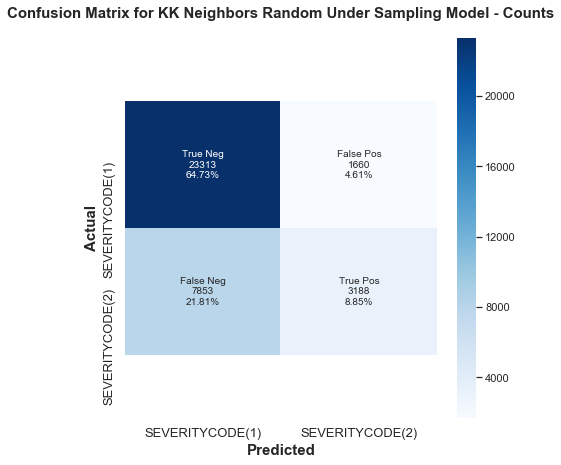

roc_auc_score:  0.6111350861230647


In [75]:
con_matrix_and_clas_report(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, 'KK Neighbors Random Under Sampling Model', cmap='Purples', cbar=False)

#Checking performance our model with ROC Score.

print("roc_auc_score: ",roc_auc_score(y_test, y_pred))

## <span style="color:red"> ML Model Tuning K Neighbors Classifier Base Model</span>

In [76]:
#List Hyperparameters that we want to tune.

#leaf_size = list(range(1,40))
n_neighbors = list(range(1,10))
#p=[1,2]

In [77]:
#Convert to dictionary

#hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

hyperparameters = dict(n_neighbors=n_neighbors)

In [78]:
#Create new KNN object
knn_2 = KNeighborsClassifier()

In [79]:
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=5)

In [80]:
#Fit the model
best_model = clf.fit(X_train,y_train)

In [63]:
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [89]:
best_model.best_params_

{'n_neighbors': 8}

In [92]:
best_knn = KNeighborsClassifier(n_neighbors=8)

In [93]:
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [95]:
y_pred = best_knn.predict(X_test)

Confusion Matrix: 
 [[22706  2267]
 [ 7109  3932]]

True negative:  22706 False positive:  2267 False negative:  7109 True positive:  3932

Specificity:  0.9092219597164938

Classification report: 
 
               precision    recall  f1-score   support

           1       0.76      0.91      0.83     24973
           2       0.63      0.36      0.46     11041

    accuracy                           0.74     36014
   macro avg       0.70      0.63      0.64     36014
weighted avg       0.72      0.74      0.71     36014



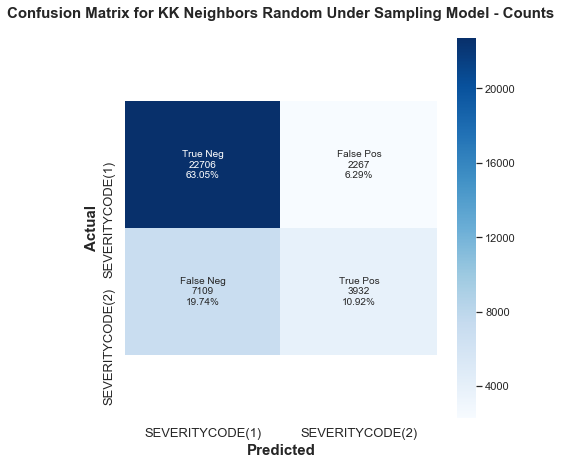

roc_auc_score:  0.6326745610556023


In [97]:
con_matrix_and_clas_report(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, 'KK Neighbors Random Under Sampling Model', cmap='Purples', cbar=False)
print("roc_auc_score: ",roc_auc_score(y_test, y_pred))

In [ ]:
# Visualize some accidents on the map

In [ ]:
CLIENT_ID = '5LMC2BTAOAZAUOWXLVSNB4O3012A4CSCINFW031DMIQMUAJ4' 
CLIENT_SECRET = '5CCCJ5A1FVJXFERY0HM3OQQCHPSVDN31MHIU0V1ONLX3SZ5O' 

VERSION = '20180604'
LIMIT = 1000
radius=400000

In [ ]:
# Get Seattle, Washington location

address = 'Seattle, Washington'

geolocator = Nominatim(user_agent="coursera_project")
location = geolocator.geocode(address)

P_latitude = location.latitude
P_longitude = location.longitude

print(P_latitude, P_longitude)

In [85]:
venues_map = folium.Map(location=[P_latitude, P_longitude], zoom_start=13) 

# add a red circle marker to represent the Providence
folium.CircleMarker(
                    [P_latitude, P_longitude],
                    radius=10,
                    color='red',
                    popup='Seattle, Washington Center',
                    fill = True,
                    fill_color = 'red',
                    fill_opacity = 0.6
                    ).add_to(venues_map)

# display map

venues_map

In [ ]:
data_map = df.dropna()


# add accidents as blue circle markers

for lat, lng, label in zip(data_map[0:2000].Y, 
                           data_map[0:2000].X, 
                           data_map[0:2000].SEVERITYCODE):
    
    folium.CircleMarker([lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map

venues_map